When you try to spot objects in an image, you can do so by its characteristics, like the shape. This what Morphology does.

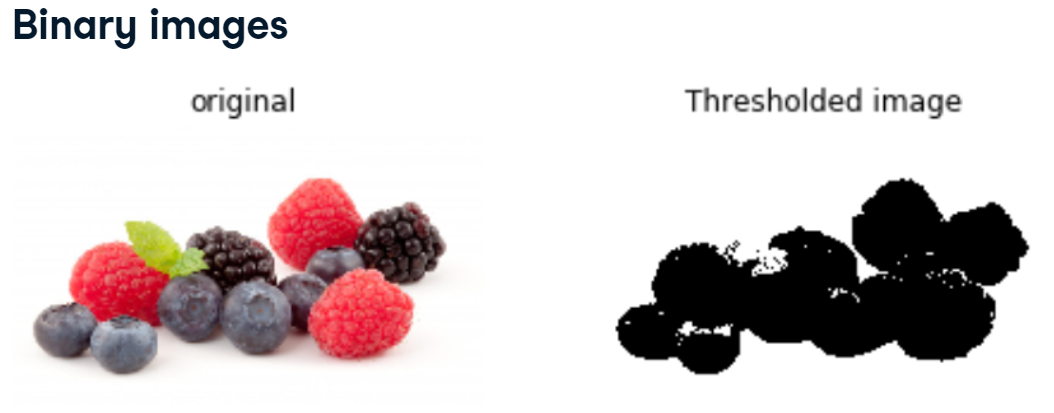

Binary regions produced by simple thresholding can be distorted by noise and texture, as we can see in the image.

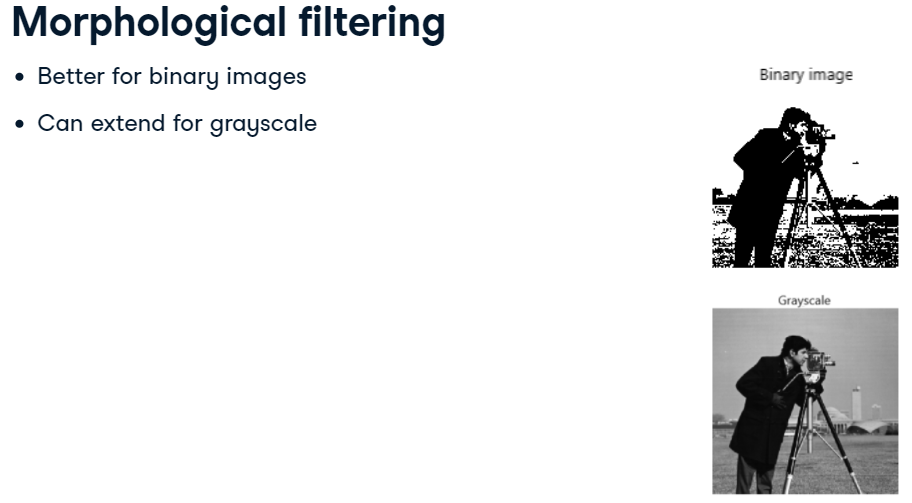

Morphological filtering operations try to remove these imperfections by accounting for the form and structure of the objects in the image. These operations are especially suited to binary images, but some can extend to grayscale ones.

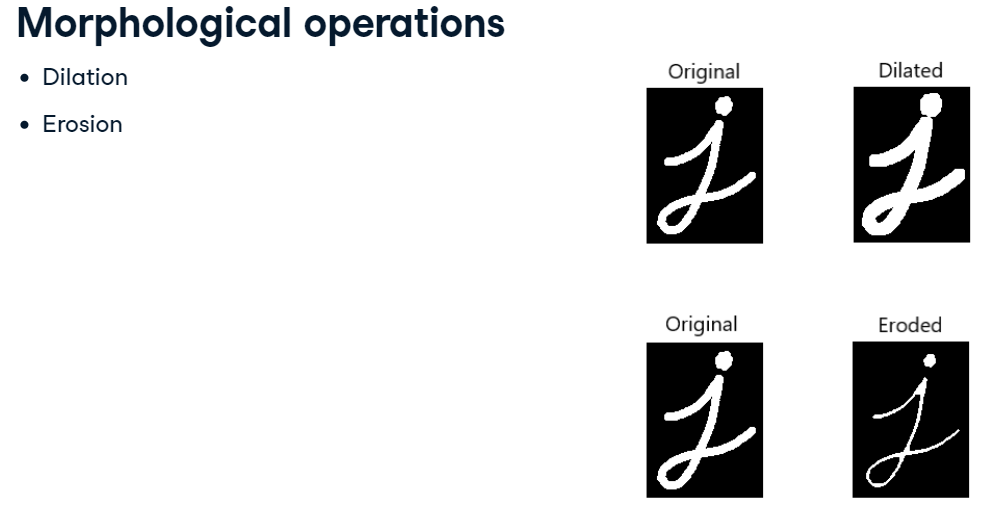

Basic morphological operations are dilation and erosion. Dilation adds pixels to the boundaries of objects in an image, while erosion removes pixels on object boundaries. The number of pixels added or removed from the objects in an image depends on the size and shape of a structuring element used to process the image.

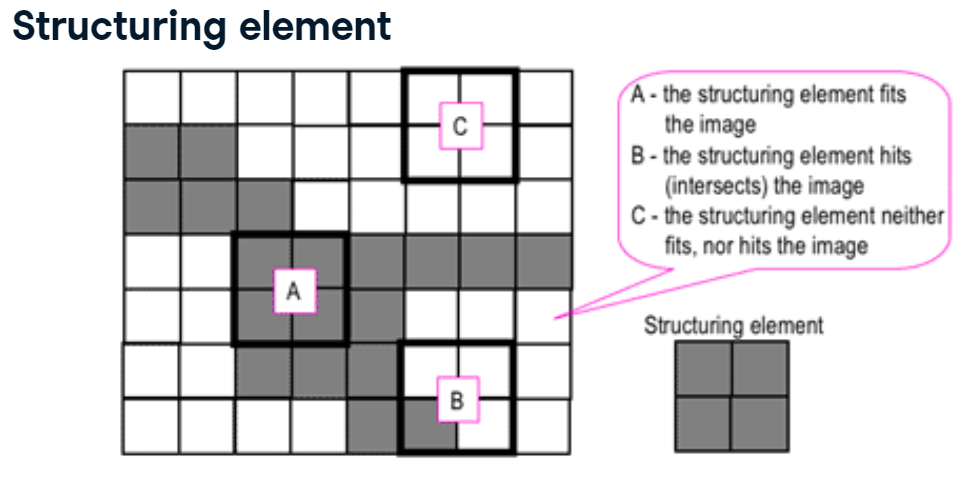

The structuring element is a small binary image used to probe the input image. We try to "fit" in the image object we want to get its shape. Here, the square structuring element named "A" fits in the object we want to select. The "B" intersects the object and the "C" is out of it. So if we want to select an apple in a table, we want the structuring element fit in that apple so then expands, probe and obtain the shape.

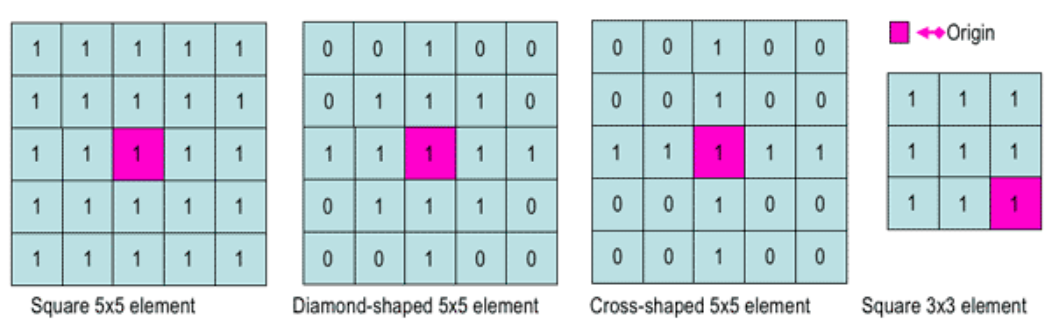

The dimensions specify the size of the structuring element. Like a square of 5 by 5 pixels. The pattern of ones and zeros specifies the shape of the structuring element. This should be of a similar form to the shape of the object we want to select. So we see in here different types of shapes, from squares, to diamond. The pink cell is the center or origin of the structuring element. Identifies the pixel being processed.

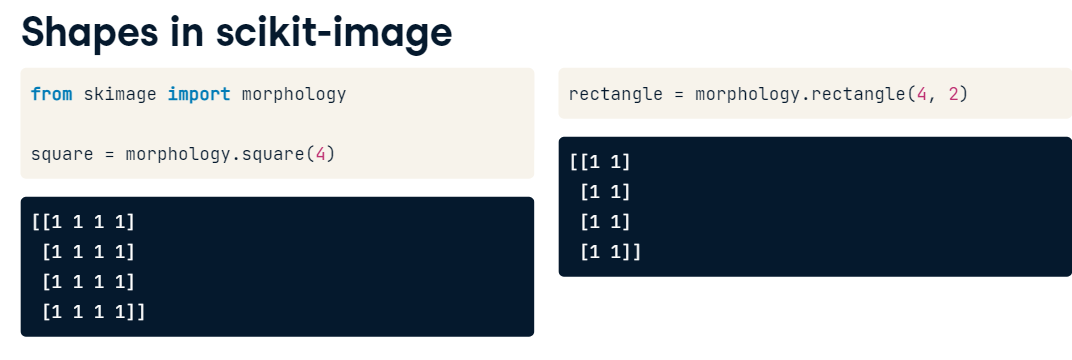

scikit-image has multiple shapes for this structured element, each one with its own method from the morphology module. If we want square as the structured element, we can obtain it with the square method. Or a rectangle with width and height. This will return the desired shape and if we print we'll see how these are formed with 1s.

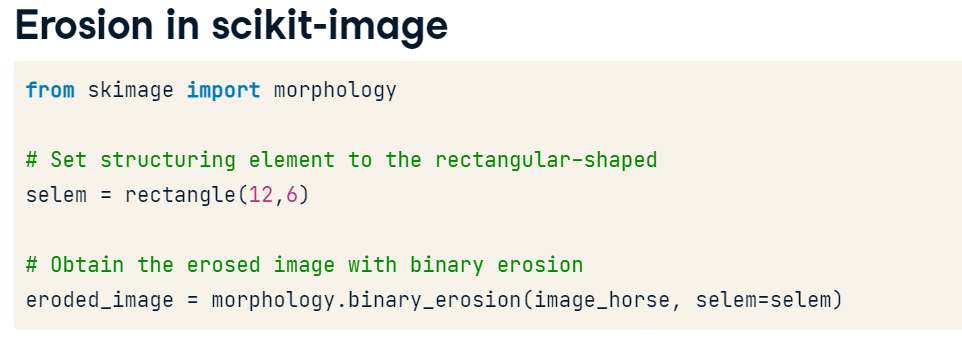

To apply erosion we can use the binary erosion function. With this we can optionally set a structuring element to use in the operation. Here we import it and load a binary horse image.

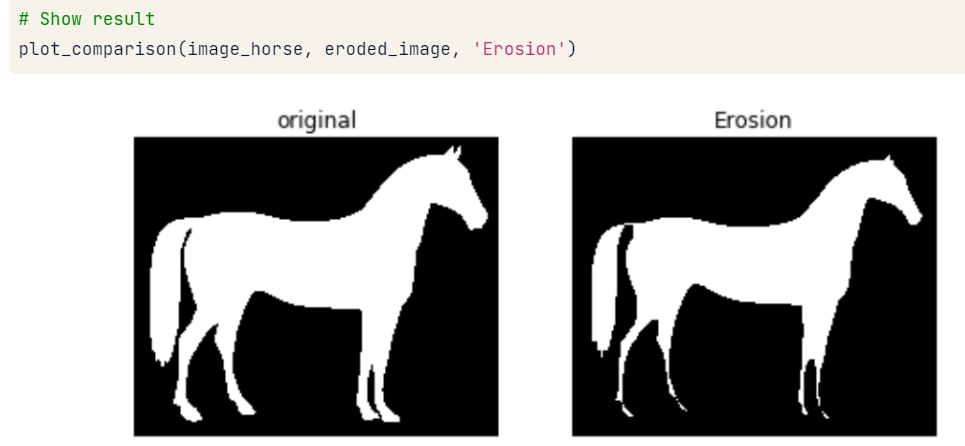

Set the structuring element to a rectangular-shaped, since it's somewhat similar to the shape we want to obtain, which is a horse. And obtain the eroded image by using this function, passing the image and structuring element as parameters. If not set, the function will use a cross-shaped structured element.


Showing the resulting image, next to the original to compare them, we see that the resulted image is missing some pixels. But still kind of showing the horse shape.

If we apply binary erosion with default structuring element shape, we would obtain this eroded image. It's working better, more accurate than before. So for this image the cross-shaped works great.

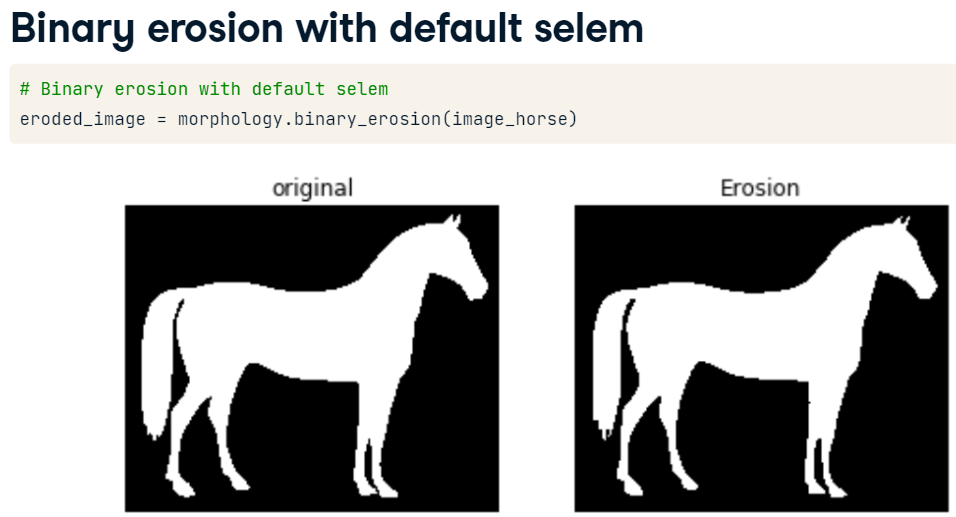


Now let's look at dilation. As the name implies, this operation sort of "expands" the objects in the image. Here, we use binary dilation function, also from the morphology module, on image_horse. Let's use the default structuring element, which is cross-shaped. Next, plot the result.

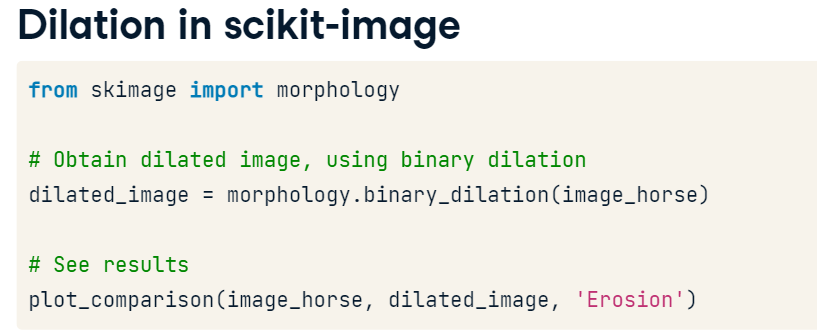

We see that dilation is indeed adding just a little bit in some parts, like the lower legs and paws. We see that the default structuring element works well.

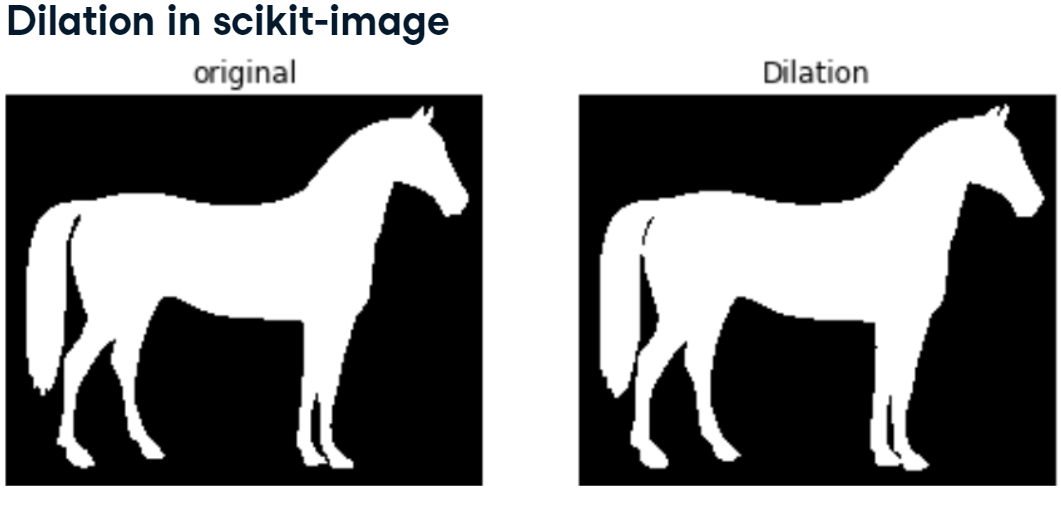

### Handwritten letters
A very interesting use of computer vision in real-life solutions is performing Optical Character Recognition (OCR) to distinguish printed or handwritten text characters inside digital images of physical documents.

Let's try to improve the definition of this handwritten letter so that it's easier to classify.

![r](./images/r5.png)

In [6]:
from skimage import morphology,color
import matplotlib.pyplot as plt

In [7]:
import numpy as np

def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')

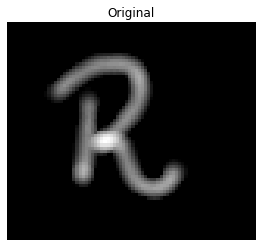

In [8]:
upper_r_image = plt.imread('./images/r5.png')
upper_r_image = color.rgb2gray(upper_r_image)

# Obtain the eroded shape
eroded_image_shape = morphology.binary_erosion(upper_r_image)

# See results
show_image(upper_r_image, 'Original')

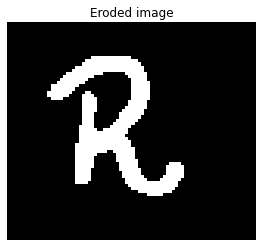

In [9]:
# See results
show_image(eroded_image_shape, 'Eroded image')

Clearly, erosion is useful for removing minor white noise.

### Improving thresholded image
In this exercise, we'll try to reduce the noise of a thresholded image using the dilation morphological operation.

This operation, in a way, expands the objects in the image.

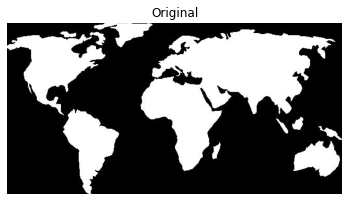

In [11]:
world_image = plt.imread('./images/world_image_binary.jpg')

# Obtain the dilated image
dilated_image = morphology.binary_dilation(world_image)

# See the result
show_image(world_image, 'Original')

We have removed the noise of the segmented image and now it's more uniform.